In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-detection/valid/0/2030_992775426_png.rf.df85416a26dd4cb665bb104d6a34d303.jpg
/kaggle/input/breast-cancer-detection/valid/0/2564_1570678080_png.rf.135a908f06be029039778a6df2ab5149.jpg
/kaggle/input/breast-cancer-detection/valid/0/2704_781524556_png.rf.c3007300f84e02ef651821761af1c8a9.jpg
/kaggle/input/breast-cancer-detection/valid/0/294_2044098614_png.rf.1f17493146bfa674226f43a711f6c141.jpg
/kaggle/input/breast-cancer-detection/valid/0/866_1033311478_png.rf.ff97b307c7b296343424c8e5aa172c27.jpg
/kaggle/input/breast-cancer-detection/valid/0/370_1943620586_png.rf.6b2845edfbb223f65f126beabd7aee6a.jpg
/kaggle/input/breast-cancer-detection/valid/0/2546_730952035_png.rf.0aa3bdf9935f0ebed78558c5259bc6bb.jpg
/kaggle/input/breast-cancer-detection/valid/0/2282_2092132689_png.rf.8b110ae2768e8650d7b30dce6ed00e36.jpg
/kaggle/input/breast-cancer-detection/valid/0/561_1308043124_png.rf.e7f17d151c0e2df684b5569befe144f1.jpg
/kaggle/input/breast-cancer-detection/valid/0/2112_19

In [37]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rm1000/brain-tumor-mri-scans")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-tumor-mri-scans


In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt


In [39]:
Brain_tumar='/kaggle/input/brain-tumor-mri-scans'

**Loading the Images and Extracting the data from the image and store it in the train_data.**

In [40]:
categories = ["glioma", "healthy", "meningioma", "pituitary"]
train_data = []
Brain_tumar = "/kaggle/input/brain-tumor-mri-scans"  # Change this to the correct path

for category in categories:
    category_path = os.path.join(Brain_tumar, category)
    index = categories.index(category)
    
    for image in os.listdir(category_path):
        img_path = os.path.join(category_path, image)
        img = cv2.imread(img_path)
        print(f'The Path {img_path} and index is {index}')
        img_resized = cv2.resize(img, (224, 224))
        train_data.append([img_resized, index])


The Path /kaggle/input/brain-tumor-mri-scans/glioma/0664.jpg and index is 0
The Path /kaggle/input/brain-tumor-mri-scans/glioma/1269.jpg and index is 0
The Path /kaggle/input/brain-tumor-mri-scans/glioma/0733.jpg and index is 0
The Path /kaggle/input/brain-tumor-mri-scans/glioma/0106.jpg and index is 0
The Path /kaggle/input/brain-tumor-mri-scans/glioma/0375.jpg and index is 0
The Path /kaggle/input/brain-tumor-mri-scans/glioma/1075.jpg and index is 0
The Path /kaggle/input/brain-tumor-mri-scans/glioma/0285.jpg and index is 0
The Path /kaggle/input/brain-tumor-mri-scans/glioma/0591.jpg and index is 0
The Path /kaggle/input/brain-tumor-mri-scans/glioma/0799.jpg and index is 0
The Path /kaggle/input/brain-tumor-mri-scans/glioma/1411.jpg and index is 0
The Path /kaggle/input/brain-tumor-mri-scans/glioma/0074.jpg and index is 0
The Path /kaggle/input/brain-tumor-mri-scans/glioma/1031.jpg and index is 0
The Path /kaggle/input/brain-tumor-mri-scans/glioma/0077.jpg and index is 0
The Path /ka

**Let's Plot and Check the images**

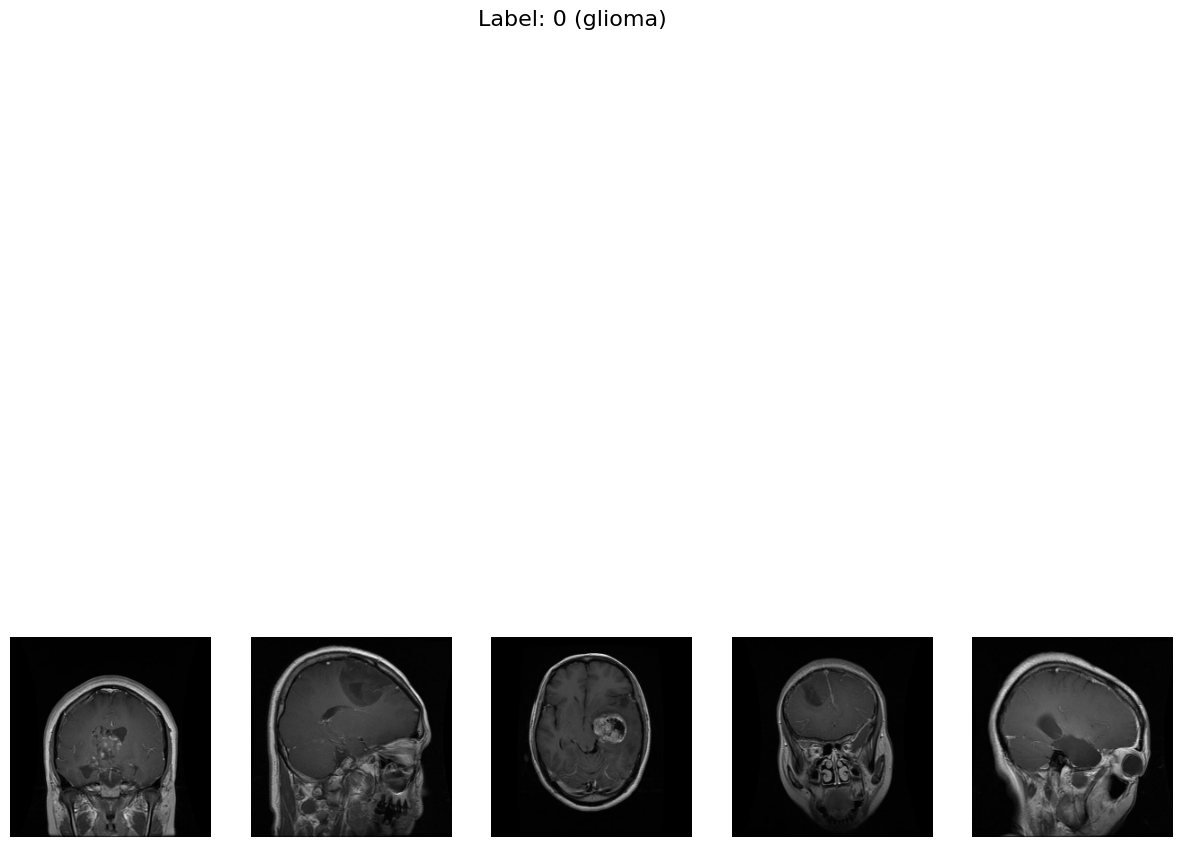

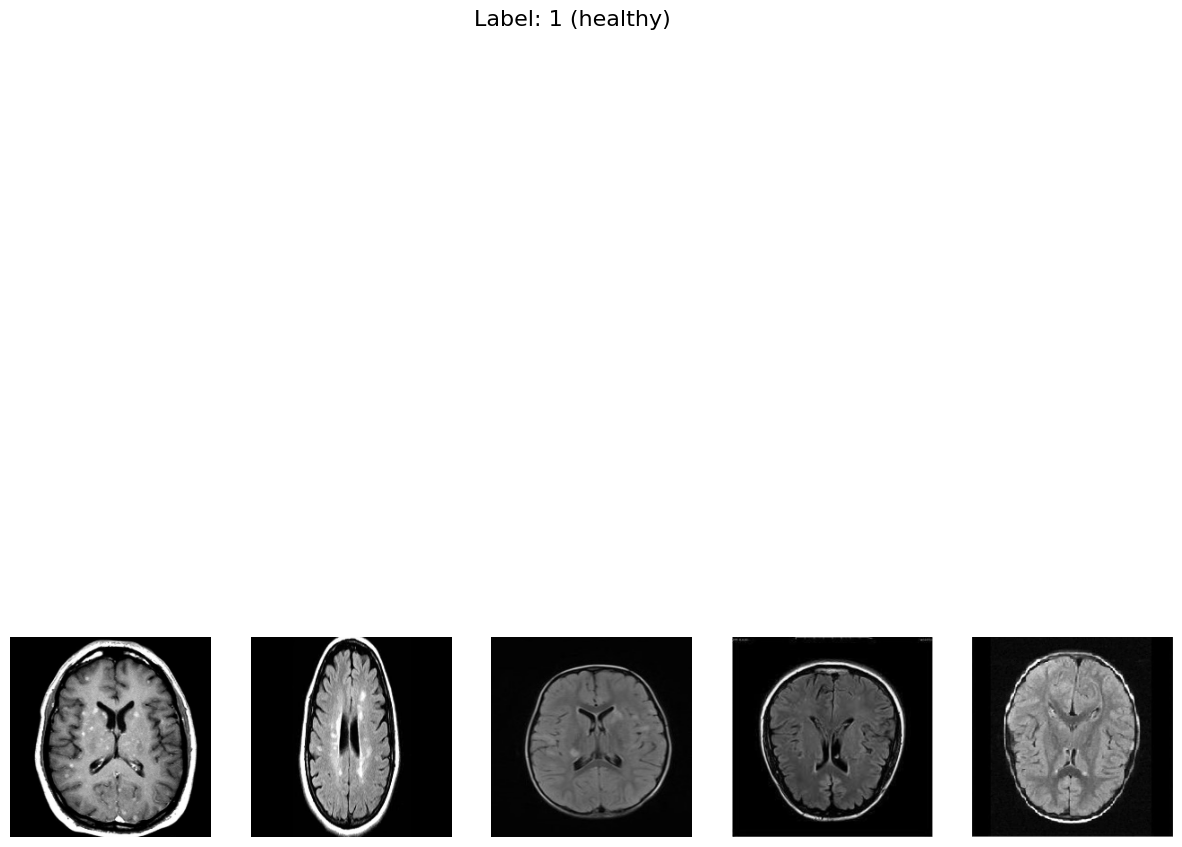

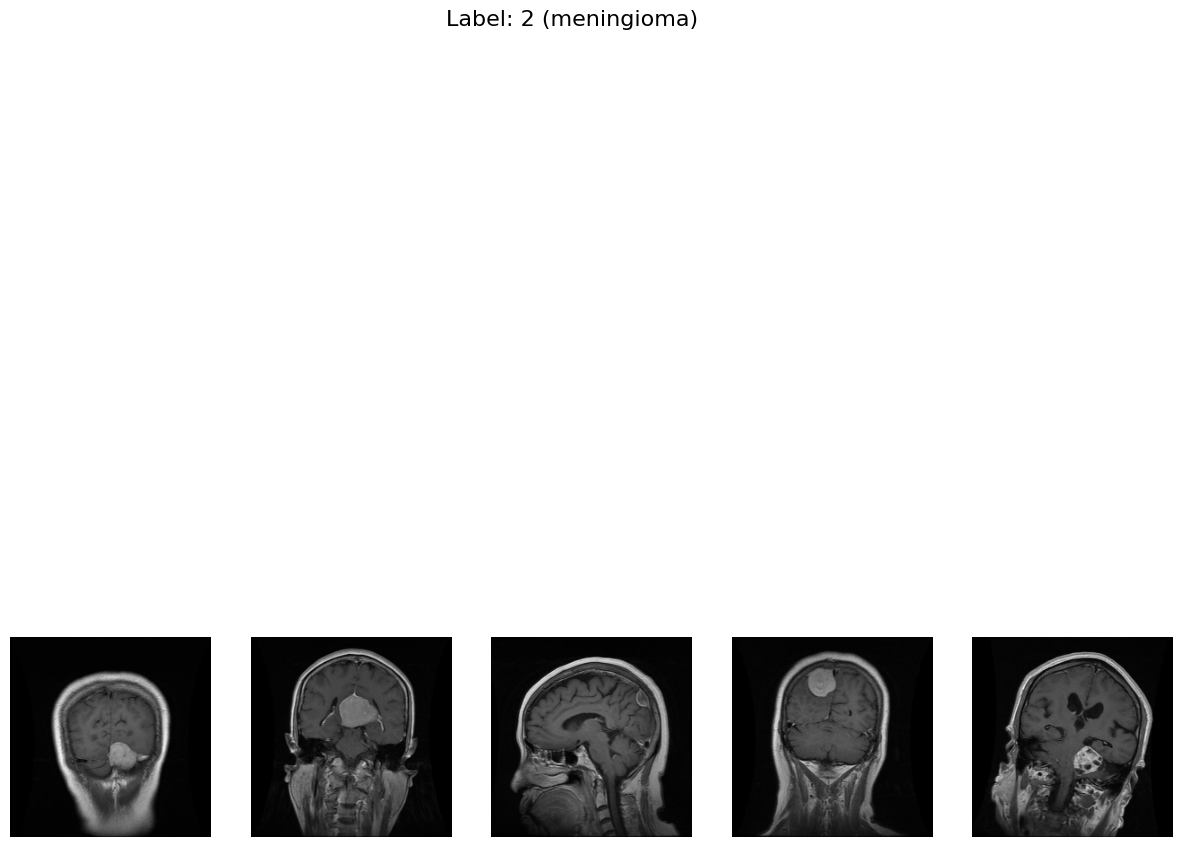

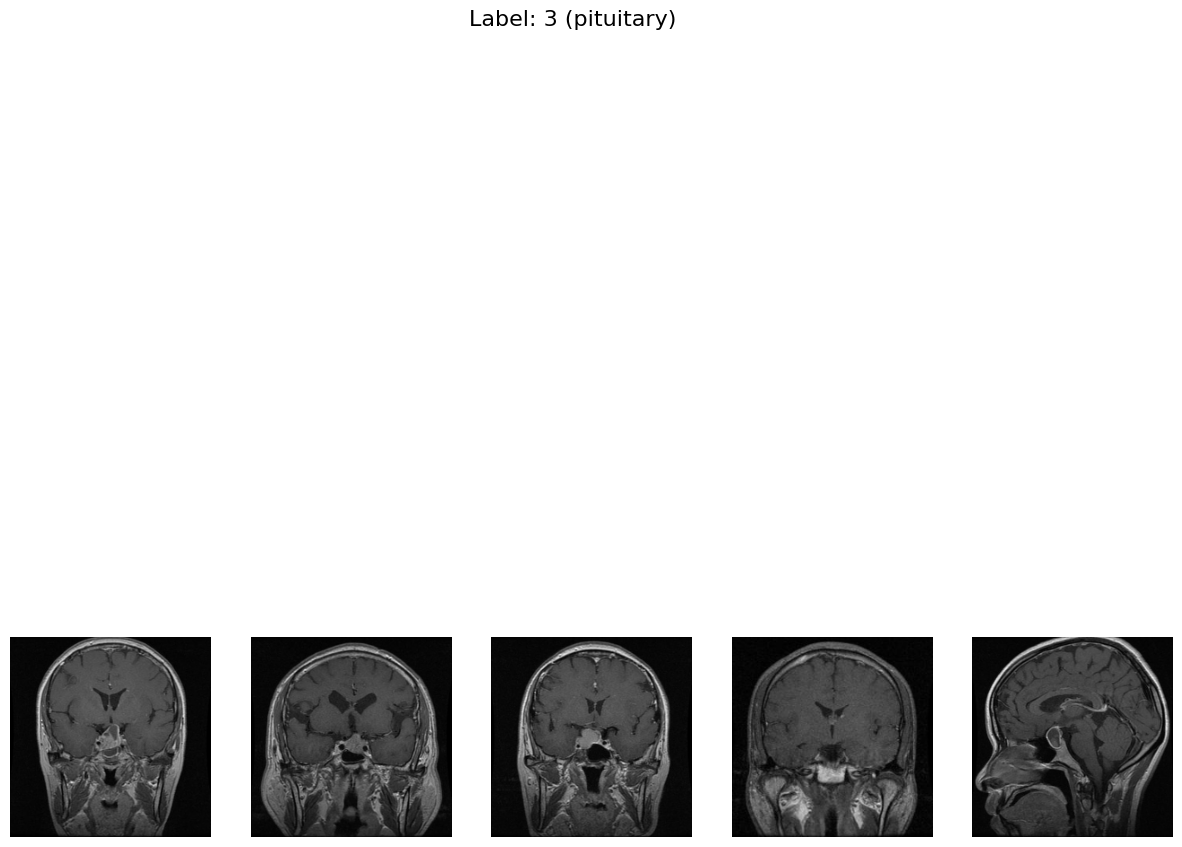

In [41]:
import cv2
import matplotlib.pyplot as plt


# The categories defined earlier
categories = ["glioma", "healthy", "meningioma", "pituitary"]

# Function to visualize images from each label
def visualize_images_from_labels(train_data, categories, num_images=5):
    # Convert train_data into separate lists based on label
    label_dict = {i: [] for i in range(len(categories))}  # Dictionary to store images by label
    
    for img, label in train_data:
        label_dict[label].append(img)
    
    # Now, visualize a few images from each label
    for label in label_dict:
        fig, axes = plt.subplots(1, num_images, figsize=(15, 15))
        fig.suptitle(f"Label: {label} ({categories[label]})", fontsize=16)
        
        for i, ax in enumerate(axes):
            if i < len(label_dict[label]):
                ax.imshow(cv2.cvtColor(label_dict[label][i], cv2.COLOR_BGR2RGB))
                ax.axis("off")  # Turn off axis lines and labels
        plt.show()

# Call the function to visualize images
visualize_images_from_labels(train_data, categories, num_images=5)


**Converting the List into the Array**

In [42]:
X = np.array([i[0] for i in train_data])  # Image data
y = np.array([i[1] for i in train_data]) # Labels
print(X.shape)


(7023, 224, 224, 3)


**Splitting the Data for Training, Testing and Validation**

In [43]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

**Converting the Range of value with in 0 to 1**

In [44]:
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val/255

In [45]:
X_train

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]

**Now Lets Check the length of Train, Test and Validation Data**

In [46]:
print(len(X_train))
print(len(X_val))
print(len(X_test))

4916
1053
1054


**Let's Check whether all the Class is have a equal Weitage or Not**

In [47]:
import pandas as pd
Val_count_train =pd.Series(y_train)
print('Train')
Val_count_train.value_counts()

Train


1    1400
3    1230
2    1151
0    1135
Name: count, dtype: int64

In [48]:
import pandas as pd
Val_count_test =pd.Series(y_test)
print('Test')
Val_count_test.value_counts()

Test


1    300
3    264
2    247
0    243
Name: count, dtype: int64

In [49]:
import pandas as pd
Val_count_Val =pd.Series(y_val)
print('val')
Val_count_test.value_counts()

val


1    300
3    264
2    247
0    243
Name: count, dtype: int64

**Defining the Model**

In [50]:
import tensorflow as tf

In [51]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(24, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 24)   │         6,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 69984)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     8,958,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,966,428 (34.20 MB)

 Trainable params: 8,966,428 (34.20 MB)

 Non-trainable params: 0 (0.00 B)

**Declaring the optimizer, loss and Training the Model**

In [52]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5)

Epoch 1/5
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.5692 - loss: 1.0237 - val_accuracy: 0.8262 - val_loss: 0.4006
Epoch 2/5
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8936 - loss: 0.2692 - val_accuracy: 0.9012 - val_loss: 0.2810
Epoch 3/5
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9747 - loss: 0.0842 - val_accuracy: 0.9221 - val_loss: 0.2840
Epoch 4/5
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9868 - loss: 0.0389 - val_accuracy: 0.9202 - val_loss: 0.3405
Epoch 5/5
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9890 - loss: 0.0316 - val_accuracy: 0.9269 - val_loss: 0.2927


**Evaluating the model in the Test data**

In [53]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9252 - loss: 0.2507
Test Accuracy: 93.74%


**Predicting the Value and Ploting the Confusion matrix and Classification Report for Test Data**

In [54]:
y_pred=model.predict(X_test)
y_pred=y_pred.argmax(axis=1)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [55]:
print(y_test)
print(y_pred)

[0 1 1 ... 0 3 1]
[0 1 2 ... 0 3 1]


In [59]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_test is the true labels and y_pred is the predicted labels

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[221   0  21   1]
 [  1 277  18   4]
 [  6   5 234   2]
 [  0   0   8 256]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       243
           1       0.98      0.92      0.95       300
           2       0.83      0.95      0.89       247
           3       0.97      0.97      0.97       264

    accuracy                           0.94      1054
   macro avg       0.94      0.94      0.94      1054
weighted avg       0.94      0.94      0.94      1054



**Predicting the Value and Ploting the Confusion matrix and Classification Report for Train Data**

In [57]:

y_pred_Train=model.predict(X_val)
y_pred_Train=y_pred_Train.argmax(axis=1)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [60]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_test is the true labels and y_pred is the predicted labels

# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_Train)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_val, y_pred_Train)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[211   0  31   1]
 [  0 284  14   2]
 [  3   7 230   7]
 [  1   0  11 251]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       243
           1       0.98      0.95      0.96       300
           2       0.80      0.93      0.86       247
           3       0.96      0.95      0.96       263

    accuracy                           0.93      1053
   macro avg       0.93      0.93      0.93      1053
weighted avg       0.93      0.93      0.93      1053

